<a href="https://colab.research.google.com/github/wawosz/Colaboratory/blob/testing/PSF_and_Wiener_deconvolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# standard imports
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, data, restoration
from scipy.signal import convolve2d as conv2
from tabulate import tabulate

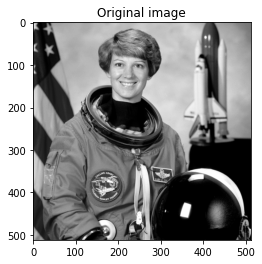

In [ ]:
# image sample
astro = color.rgb2gray(data.astronaut())
plt.title('Original image')
plt.imshow(astro, cmap='gray')

+------+------+------+------+------+
| 0.04 | 0.08 | 0.16 | 0.08 | 0.04 |
+------+------+------+------+------+
| 0.08 | 0.16 | 0.32 | 0.16 | 0.08 |
+------+------+------+------+------+
| 0.16 | 0.32 | 0.64 | 0.32 | 0.16 |
+------+------+------+------+------+
| 0.08 | 0.16 | 0.32 | 0.16 | 0.08 |
+------+------+------+------+------+
| 0.04 | 0.08 | 0.16 | 0.08 | 0.04 |
+------+------+------+------+------+


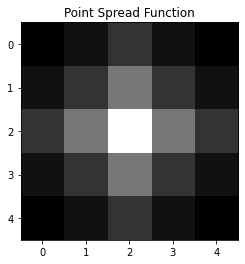

In [ ]:
# define PSF as an array
# psf = np.ones((5, 5)) / 25
psf = np.array([[1,2,4,2,1],[2,4,8,4,2],[4,8,16,8,4],[2,4,8,4,2],[1,2,4,2,1]])
psf = psf / 25
print(tabulate(psf,tablefmt="grid"))
plt.title('Point Spread Function')
plt.imshow(psf, cmap='gray')

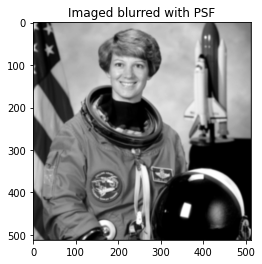

In [ ]:
# convolution of an original image and the PSF
astro_PSF = conv2(astro, psf, 'same')
plt.title('Imaged blurred with PSF')
plt.imshow(astro_PSF, cmap='gray')

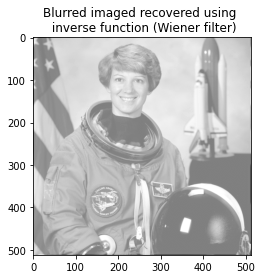

In [ ]:
# deconvolution of blurred image with Wiener filter
astro_deconvolved, noise = restoration.unsupervised_wiener(astro_PSF, psf)
plt.title('Blurred imaged recovered using \n inverse function (Wiener filter)')
plt.imshow(astro_deconvolved, cmap='gray')